In [9]:
# %matplotlib inline: This line is a Jupyter Notebook magic command that ensures plots created by Matplotlib are displayed inline, directly below the code cells in your notebook.
%matplotlib inline
# from matplotlib import style: This imports the style module from Matplotlib, which allows you to customize the appearance of your plots.
from matplotlib import style
# style.use('fivethirtyeight'): Sets the style of the plots to 'fivethirtyeight', which is a predefined style provided by Matplotlib that mimics the aesthetics of the popular website FiveThirtyEight.
style.use('fivethirtyeight')
# import matplotlib.pyplot as plt: Imports the pyplot module from Matplotlib and renames it to plt for ease of use. pyplot is a collection of functions that make Matplotlib work like MATLAB, providing a simple way to create figures, plot areas, etc.
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
# import sqlalchemy: Imports the SQLAlchemy library, which is a SQL toolkit and Object-Relational Mapping (ORM) library for Python.
import sqlalchemy
# from sqlalchemy.ext.automap import automap_base: Imports the automap_base function from SQLAlchemy, which is used to automatically generate mapped classes and relationships from a database schema.
from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session: Imports the Session class from SQLAlchemy. A Session establishes and maintains all conversations between your program and the databases.
from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func: Imports create_engine (used to connect to the database) and func (used in queries to call SQL functions) from SQLAlchemy.
from sqlalchemy import create_engine, func

In [4]:
# Creating an Engine to Connect to the SQLite Database:
# create engine to hawaii.sqlite
# This line creates a connection to the SQLite database file hawaii.sqlite located in the Resources folder. The create_engine function takes a database URL as an argument. For SQLite, the URL format is sqlite:///, followed by the file path.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# Base = automap_base(): Creates a base class for an automap schema in SQLAlchemy. This base class will contain generated ORM classes.
Base = automap_base()
# reflect the tables
# Base.prepare(engine, reflect=True): Reflects the tables from the database (pointed by engine) into the model. This means SQLAlchemy will automatically generate mapping classes for the database tables.
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
# Exploring the Database Schema:
# This line is used to display the names of the tables that have been mapped into ORM classes. It helps in understanding what tables are available in the database for querying.
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
# Here, Measurement and Station are variables that now hold references to the corresponding tables in the database. 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
# Creating a Session Object to Manage Queries (Linking Python to the Database):
# Creates a session linked to the database. This session will be used for all subsequent queries and operations. The session is essentially a workspace for your objects, providing a link between the Python application and the database.
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
# ('2017-08-23',)
# Query to find the most recent date in the Measurement table
# Use SQLAlchemy to query the Measurement table and find the most recent date.Use the func.max() function to find the maximum date, which corresponds to the most recent date:
most_recent_date = session.query(func.max(Measurement.date)).one()[0]

print("Most Recent Date:", most_recent_date)

Most Recent Date: 2017-08-23


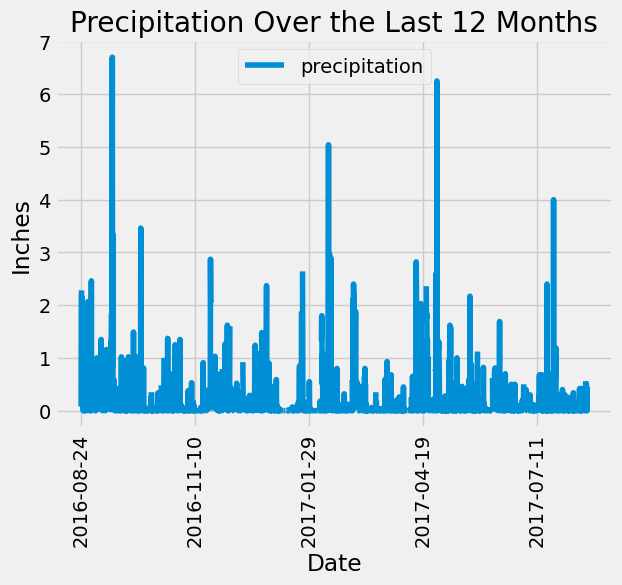

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
from datetime import datetime, timedelta

# Convert the most recent date string to a datetime object
# Converts the most recent date from a string to a datetime object.
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date
# Calculates the date one year ago from the most recent date using timedelta(days=365).
date_one_year_ago = most_recent_date - timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
# This query retrieves the date and precipitation (prcp) from the Measurement table.
# It filters the data to only include dates greater than or equal to date_one_year_ago.
# The results are ordered by date.
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
                     filter(Measurement.date >= date_one_year_ago).\
                     order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
import pandas as pd

# Create a DataFrame from the query results
# Creates a Pandas DataFrame from the query results.
# Sets the column names to 'date' and 'precipitation'.
df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])


# Sort the dataframe by date
# Sorts the DataFrame in place by the 'date' column.
df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# Plots the data using Pandas' built-in plotting capabilities, with 'date' on the x-axis and 'precipitation' on the y-axis.
# Sets the x-axis labels to rotate 90 degrees for better readability.
# Adds labels for the x-axis, y-axis, and a title to the plot.
# Displays the plot.
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Over the Last 12 Months")
plt.show()


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Calculate the summary statistics for the precipitation data
precipitation_stats = df['precipitation'].describe()

print(precipitation_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
# Calculate the total number of stations
# session.query(func.count(Station.station)): This line creates a query that uses the func.count() function to count the total number of unique station identifiers
# .scalar(): This method runs the query and returns the result as a single scalar value, which is appropriate here since the query produces a single count value.
total_stations = session.query(func.count(Station.station)).scalar()
# print("Total number of stations:", total_stations): This line prints out the total number of stations.
print("Total number of stations:", total_stations)


Total number of stations: 9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# session.query(Measurement.station, func.count(Measurement.station)): Starts a query that selects two columns: the station identifier and a count of how many times each station appears in the dataset.
# .group_by(Measurement.station): Groups the data by the station identifier, which is necessary for the count to be calculated per station.
# .order_by(func.count(Measurement.station).desc()): Orders the results in descending order based on the count, so the most active stations appear first.
# .all(): Executes the query and returns all results.
# Query to find the most active stations
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()

# Display the list of stations and their counts in descending order
# The for loop iterates over the results and prints each station's identifier and its corresponding count.
for station, count in most_active_stations:
    print("Station:", station, "Count:", count)


Station: USC00519281 Count: 2772
Station: USC00519397 Count: 2724
Station: USC00513117 Count: 2709
Station: USC00519523 Count: 2669
Station: USC00516128 Count: 2612
Station: USC00514830 Count: 2202
Station: USC00511918 Count: 1979
Station: USC00517948 Count: 1372
Station: USC00518838 Count: 511


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Assuming 'most_active_station' contains the ID of the most active station
# Retrieve the most active station ID from the most_active_stations list
most_active_station_id = most_active_stations[0][0]  # Get the station ID of the most active station

# Query to find the lowest, highest, and average temperature of the most active station
# Use session.query() to create a new query that selects the lowest (func.min(Measurement.tobs)), highest (func.max(Measurement.tobs)), and average (func.avg(Measurement.tobs)) temperature measurements (tobs column) for the most active station.
# filter(Measurement.station == most_active_station_id) ensures that the query only considers data from the most active station.
# .one() executes the query and returns the result as a single row.
temperatures = session.query(func.min(Measurement.tobs), 
                             func.max(Measurement.tobs),
                             func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active_station_id).one()
# Unpack the returned tuple into lowest_temp, highest_temp, and average_temp.
lowest_temp, highest_temp, average_temp = temperatures

print(f"Most Active Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {round(average_temp, 2)}")


Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


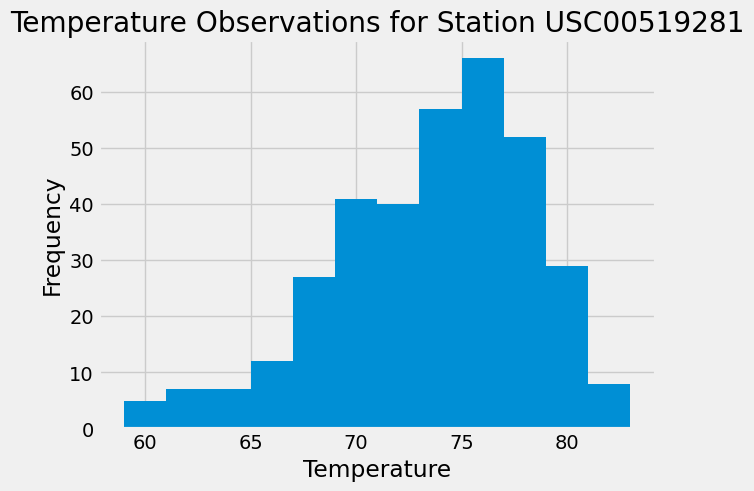

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Calculate the date one year from the last date in the dataset
date_one_year_ago = most_recent_date - timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active_station_id).\
                    filter(Measurement.date >= date_one_year_ago).all()

# Extract temperature observations from the query results
temperatures = [temp[0] for temp in temperature_data]

# Plotting the results as a histogram
plt.hist(temperatures, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id}')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()